# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd 

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join('..','..', '02-zajem-podatkov', 'predavanja', 'obdelani-podatki', 'filmi.csv')

filmi = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values(['ocena', 'leto'], ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9902,7286456,Joker,122,2019,9.5,70.0,14789,NaN,R,An original standalone origin story of the ico...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."
9946,7738784,Peranbu,147,2018,9.3,NaN,10415,NaN,NaN,"A single father tries to raise his daughter, w..."
8284,2170667,Wheels,115,2014,9.3,NaN,17371,NaN,R,Two suicidal paraplegic junkies hustle their w...
2830,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2136999,28341469.0,R,Two imprisoned men bond over a number of years...
...,...,...,...,...,...,...,...,...,...,...
9718,5988370,Reis,108,2017,1.5,NaN,71969,NaN,NaN,A drama about the early life of Recep Tayyip E...
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...


Poberite stolpec ocen.

In [4]:
filmi['ocena']
ocene = filmi['ocena']
ocene

0       6.4
1       7.8
2       7.4
3       8.1
4       8.3
       ... 
9995    6.2
9996    4.3
9997    7.2
9998    5.6
9999    8.3
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [5]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    4.0
9997    7.0
9998    6.0
9999    8.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [7]:
filmi['zaokrozene ocene'] = zaokrozene
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [8]:
# filmi = filmi.drop(columns='zaokrozene ocene')
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [9]:
filmi_light = filmi[['naslov', 'leto', 'glasovi']].copy()
# kopiramo podtabelo, da ne uničimo/spreminjamo originalne
filmi_light['zaokrozena ocena'] = zaokrozene
filmi_light

,naslov,leto,glasovi,zaokrozena ocena
0,The Birth of a Nation,1915,20737,6.0
1,Intolerance: Love's Struggle Throughout the Ages,1916,13031,8.0
2,Broken Blossoms or The Yellow Man and the Girl,1919,8700,7.0
3,Das Cabinet des Dr. Caligari,1920,50866,8.0
4,The Kid,1921,100210,8.0
...,...,...,...,...
9995,Between Two Ferns: The Movie,2019,7319,6.0
9996,Secret Obsession,2019,13308,4.0
9997,Black Mirror: Bandersnatch,2018,96998,7.0
9998,Falling Inn Love,2019,7389,6.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [10]:
prej_mask = filmi['leto'] < 1930
potem_mask = filmi['leto'] > 2017
filmi[prej_mask | potem_mask]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


In [11]:
filmi.head(250).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
200,37635,Dead of Night,103,1945,7.7,NaN,9767,NaN,NaN,Architect Walter Craig (Mervyn Johns) senses i...,8.0
201,37638,Detour,68,1945,7.4,NaN,13081,16172.0,NaN,Chance events trap hitch-hiker Al Roberts in a...,7.0
202,37674,Les enfants du paradis,189,1945,8.4,NaN,16983,NaN,NaN,The theatrical life of a beautiful courtesan a...,8.0
203,37800,I Know Where I'm Going!,91,1945,7.5,NaN,7222,NaN,NaN,A young Englishwoman goes to the Hebrides to m...,8.0
204,37824,Ivan Groznyy,103,1944,7.8,NaN,8301,NaN,NaN,"During the early part of his reign, Ivan the T...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
245,40068,Bud Abbott Lou Costello Meet Frankenstein,83,1948,7.5,NaN,13345,4796000.0,NaN,Two hapless freight handlers find themselves e...,8.0
246,40160,The Big Clock,95,1948,7.7,NaN,7150,NaN,NaN,"After murdering someone, a magazine tycoon tri...",8.0
247,40202,Call Northside 777,112,1948,7.4,NaN,7341,NaN,NaN,Chicago reporter P.J. McNeal re-opens a ten ye...,7.0
248,40308,Easter Parade,103,1948,7.4,NaN,7850,9033920.0,NaN,A nightclub performer hires a naive chorus gir...,7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [12]:
def je_kratek_naslov(naslov, max_besed=2):
    len(naslov.split()) <= max_besed

dobra_ocena = filmi['ocena'] > 8

# na celi vrsti : apply
kratki_naslovi = filmi['naslov'].apply(je_kratek_naslov)

filmi[dobra_ocena & kratki_naslovi]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene


### Histogrami

Združite filme po ocenah in jih preštejte.

In [13]:
filmi['zaokrozena ocena'] = zaokrozene
po_ocenah = filmi.groupby('zaokrozena ocena').size()
po_ocenah

zaokrozena ocena
1.0        4
2.0       42
3.0       52
4.0      230
5.0      853
6.0     3193
7.0     3521
8.0     2034
9.0       70
10.0       1
dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='zaokrozena ocena'>

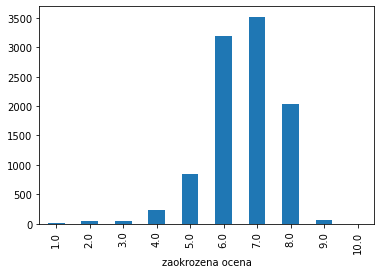

In [14]:
po_ocenah.plot.bar() # xticks

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<AxesSubplot:>

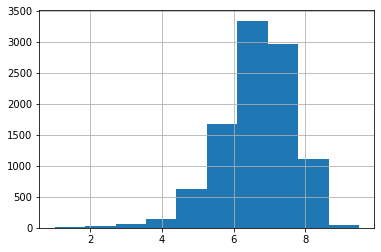

In [15]:
filmi['ocena'].hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

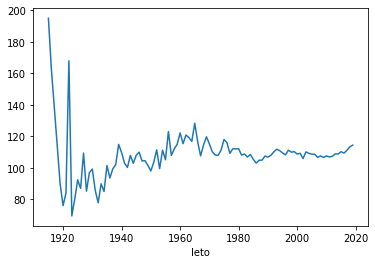

In [16]:
filmi_po_letu = filmi.groupby('leto')
povprecja_po_letu = filmi_po_letu.mean()
povprecna_dolzina = povprecja_po_letu['dolzina']
povprecna_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

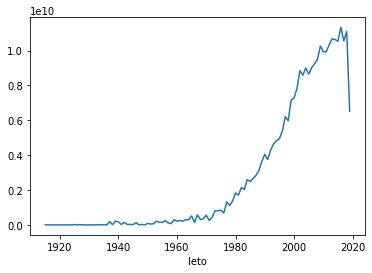

In [17]:
filmi_po_letu.sum()['zasluzek'].plot()